<h1 align="center"> Homework 6 Programming Task</h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python, 2022 Fall </h3>
<h3 align="center"> Student: Adam Camerer </h3>

**Instruction:**

Complete the following tasks (1 point for each task or question, 12 points in total). You can add additional lines if necessary.

# Task: Summarize and Visualize Data (12 points)

## (1) Read in dataset

The data file “UniversalBank.csv” contains a dataset of 5000 customers of the Universal Bank.

Below is the description of columns in the dataset.

- Id: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (1000 dollars)
- ZIPCode: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (1000 dollors)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (1000 dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have a securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by UniversalBank?

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('UniversalBank.csv')

df.head()

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## (2) Print the number of observations and the number of variables in the dataset.

Use the following format:

"Number of observations = xxx"

"Number of variables = xxx"

Do not hard code your logic.

In [37]:
print("Number of operations = " + str(len(df)))

Number of operations = 5000


In [38]:
print("Number of variables = " + str(len(df.columns)))

Number of variables = 14


## (3)  Create a contingency table (two-way frequency table) of 'Family' and 'Education', showing subtotals (margins)

In [39]:
pd.crosstab(index=df['Family'], columns=df['Education'], rownames=['Family Size'], colnames = ['Education Level'])

Education Level,1,2,3
Family Size,,,
1,678,326,468
2,657,265,374
3,349,383,278
4,412,429,381


**Question 1**: What is the value in the cell where Family=3 and Education=1? Type your answer below (0.5 point)

Your answer: 349

Interpret the meaning of this value below (0.5 point).

Your interpretation: Customers who only have an undergrad education with a family size of 3 are somewhat uncommon



## (4) Draw a scatter plot of 'Income' and 'CCAvg'.

Use Income as x variable, CCAvg as y variable.

Specify the labels of x-axis and y-axis by using easy-to-understand language.

<AxesSubplot:xlabel='Annual Income (1000$)', ylabel='Monthly credit card spending (1000$)'>

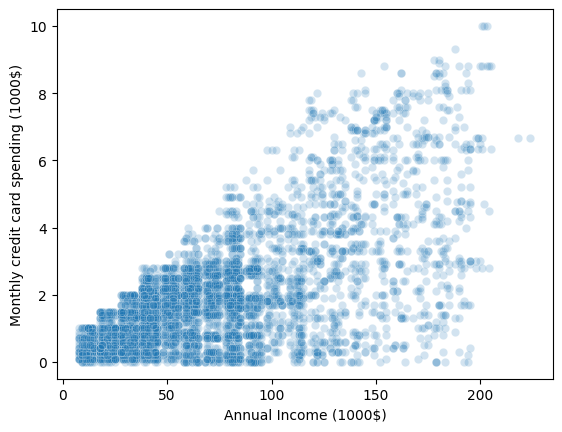

In [40]:
import seaborn as sns

#alpha was decreased to better see the relationship
plot = sns.scatterplot(data=df, x='Income', y='CCAvg', alpha=.2)
plot.set(xlabel='Annual Income (1000$)', ylabel='Monthly credit card spending (1000$)')
plot


**Question 2**: Based on the scatter plot, what is the relationship between anual income and average spending on credit cards? Type your answer below.

Your answer: Linear


## (5) Draw a boxplot of Income grouped by Personal_Loan.

Draw a boxplot of income for customers who accepted the personal loan and another boxplot for customers who did not accept the personal loan. Show all the two boxplots in a single graph.

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

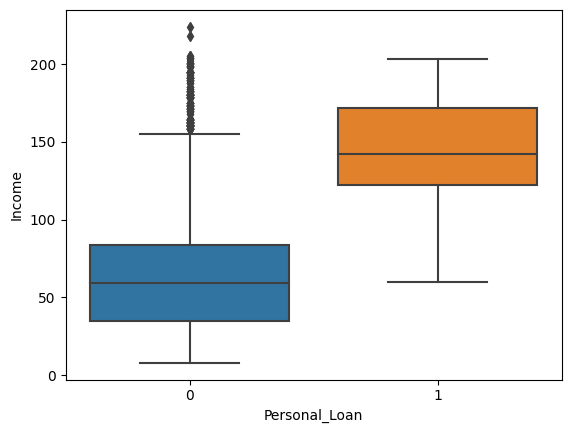

In [41]:
sns.boxplot(data=df, x='Personal_Loan', y='Income')

**Question 3**: Based on the box plot, which group of customers contains outliers of income? What is the relationship between a customer's income and whether the customer accepted the personal loan? Type all your answers below.

Your answer: Those who did not take personal loans. The relationship between both is inverse.


## (6) Detect potential outliers in Income

Draw a boxplot of Income for all customers. Show all observations in the dataset that contain outliers in the Income variable. 

<AxesSubplot:xlabel='Income'>

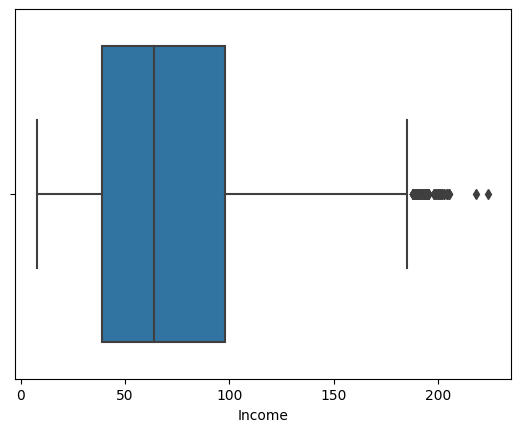

In [42]:
sns.boxplot(data=df, x='Income')

**Question 4**: How many outliers have you detected? Type your answer below.

Print your answer below. Use the format 'The number of outliers detected = xx'.

In [46]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

outliers = box_outliers(df['Income'])
print("The number of outliers detected = " + str(len(outliers)))

The number of outliers detected = 96


## (7) Draw a bar chart of CCAvg for all family sizes.

Show a bar for each family size.

Show standard errors on the bars.

<AxesSubplot:xlabel='Family', ylabel='CCAvg'>

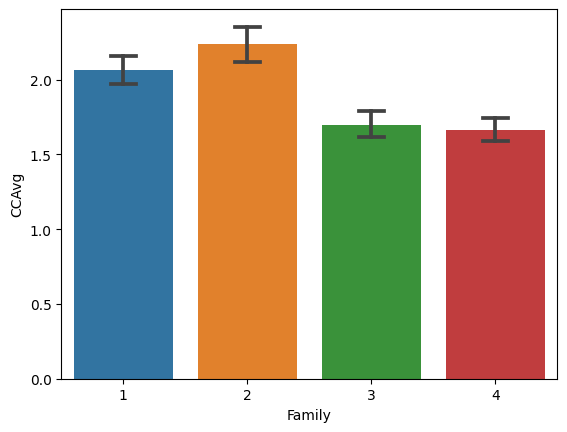

In [44]:
sns.barplot(data=df, x='Family', y='CCAvg', capsize = .2)

**Question 5**: Based on the above bar plot, which family has the highest average spending on credit cards per month? Which family size has the greatest variation in the average spending? Type your answers below.

Your answer: A family of 2 has the highest average credit card spending per month, and also the highest variation in spending